# Project: [candy data]
### this notebook is for educational purpose.

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import recordlinkage
from thefuzz import fuzz, process

# Import Data

In [2]:
df=pd.read_excel("Data_candyhierarchy2017.xlsx")

In [3]:
print(df.shape)
df.head()

(2460, 120)


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [6]:
df.select_dtypes("number")

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
0,90258773,NaN,NaN,NaN,NaN
1,90272821,NaN,1.0,NaN,NaN
2,90272829,NaN,NaN,NaN,NaN
3,90272840,NaN,1.0,NaN,NaN
4,90272841,NaN,1.0,NaN,NaN
...,...,...,...,...,...
2455,90314359,NaN,NaN,NaN,NaN
2456,90314580,NaN,1.0,NaN,NaN
2457,90314634,NaN,1.0,NaN,NaN
2458,90314658,NaN,NaN,NaN,NaN


In [7]:
df.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Internal ID              2460 non-null   int64  
 1   Q12: MEDIA [Daily Dish]  85 non-null     float64
 2   Q12: MEDIA [Science]     1362 non-null   float64
 3   Q12: MEDIA [ESPN]        99 non-null     float64
 4   Q12: MEDIA [Yahoo]       67 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 96.2 KB


In [8]:
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 115 entries, Q1: GOING OUT? to Click Coordinates (x, y)
dtypes: object(115)
memory usage: 2.2+ MB


In [9]:
df["Q12: MEDIA [Daily Dish]"].value_counts()

1.0    85
Name: Q12: MEDIA [Daily Dish], dtype: int64

In [10]:
df.columns[(df.isna().sum()>df.shape[0]/3)==True]

Index(['Q6 | Black Jacks', 'Q6 | Bonkers (the candy)',
       'Q6 | Bonkers (the board game)',
       'Q6 | Chick-o-Sticks (we don’t know what that is)', 'Q6 | Coffee Crisp',
       'Q6 | Fuzzy Peaches', 'Q6 | Goo Goo Clusters',
       'Q6 | JoyJoy (Mit Iodine!)', 'Q6 | Senior Mints',
       'Q6 | Kinder Happy Hippo', 'Q6 | Maynards',
       'Q6 | Abstained from M&M'ing.', 'Q6 | Reggie Jackson Bar',
       'Q6 | Smarties (Commonwealth)', 'Q6 | Spotted Dick',
       'Q6 | Sweetums (a friend to diabetes)', 'Q6 | Take 5',
       'Q6 | Whatchamacallit Bars', 'Q7: JOY OTHER', 'Q8: DESPAIR OTHER',
       'Q9: OTHER COMMENTS', 'Unnamed: 113', 'Q12: MEDIA [Daily Dish]',
       'Q12: MEDIA [Science]', 'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]',
       'Click Coordinates (x, y)'],
      dtype='object')

# Cleaning

In [11]:
high_nan_cols=df.columns[(df.isna().sum()>df.shape[0]/3)==True]
df.drop(columns=high_nan_cols, inplace=True)

In [12]:
df.drop(columns=["Internal ID"],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 92 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Q1: GOING OUT?                                                                         2350 non-null   object
 1   Q2: GENDER                                                                             2419 non-null   object
 2   Q3: AGE                                                                                2376 non-null   object
 3   Q4: COUNTRY                                                                            2396 non-null   object
 4   Q5: STATE, PROVINCE, COUNTY, ETC                                                       2360 non-null   object
 5   Q6 | 100 Grand Bar                                                                 

### cleaning going out column

In [14]:
goingout_mode=df["Q1: GOING OUT?"].mode()
df["Q1: GOING OUT?"].fillna(value=goingout_mode[0],inplace=True)

### cleaning gender column

In [15]:
gender_mode=df["Q2: GENDER"].mode()
df["Q2: GENDER"].fillna(value=gender_mode[0],inplace=True)

### cleaning age column

In [16]:
def clean_age(age):
    if age>100:
        age=100
    return age

In [17]:
df["Q3: AGE"]=pd.to_numeric(df["Q3: AGE"],errors="coerce")
mean_age=df["Q3: AGE"].mean()
df["Q3: AGE"].fillna(value=mean_age,inplace=True)
print(df["Q3: AGE"].max())
df["Q3: AGE"]=df["Q3: AGE"].apply(clean_age)
df["Q3: AGE"].head()

1000.0


0    42.617304
1    44.000000
2    49.000000
3    40.000000
4    23.000000
Name: Q3: AGE, dtype: float64

In [18]:
df["Q3: AGE"].median()

42.0

In [19]:
round(df["Q3: AGE"].mean(),1)

42.2

### cleaning country column

In [20]:
df["Q4: COUNTRY"].value_counts()[:10]

USA                         699
United States               497
usa                         217
Canada                      179
Usa                         139
US                          126
USA                          73
United States of America     57
us                           40
united states                38
Name: Q4: COUNTRY, dtype: int64

In [21]:
df["Q4: COUNTRY"]=(df["Q4: COUNTRY"].
                   str.lower().
                   str.replace(",","").
                   str.replace(".","").
                   str.replace("the","").
                   str.replace(" ","").
                   str.strip())

In [22]:
df["Q4: COUNTRY"].nunique()

82

In [23]:
df["Q4: COUNTRY"].value_counts()[:10]

usa                      1139
unitedstates              594
canada                    224
us                        195
unitedstatesofamerica      74
uk                         19
unitedkingdom              14
germany                    10
australia                   7
nerlands                    7
Name: Q4: COUNTRY, dtype: int64

In [24]:
choices=["usa","uk","united kingdom","united states","america"]
for country in choices:
    matches=process.extract(country,df["Q4: COUNTRY"],limit=len(df["Q4: COUNTRY"]))
    for acc in matches:
        if acc[1]>=75:
            df.loc[df["Q4: COUNTRY"]==acc[0],"Q4: COUNTRY"]=country

In [25]:
df["Q4: COUNTRY"].replace({"usa":"united states","uk":"united kingdom","america":"united states"},inplace=True)

In [26]:
df["Q4: COUNTRY"].fillna(value="other countries",inplace=True)

In [27]:
df["Q4: COUNTRY"].value_counts()[:20]

united states      2041
canada              224
other countries      69
united kingdom       33
germany              10
nerlands              7
australia             7
scotland              5
japan                 5
ireland               4
mexico                4
switzerland           3
france                3
denmark               2
sweden                2
hongkong              2
china                 2
ud                    1
southkorea            1
newjersey             1
Name: Q4: COUNTRY, dtype: int64

In [28]:
df["Q4: COUNTRY"].value_counts()

united states                 2041
canada                         224
other countries                 69
united kingdom                  33
germany                         10
nerlands                         7
australia                        7
scotland                         5
japan                            5
ireland                          4
mexico                           4
switzerland                      3
france                           3
denmark                          2
sweden                           2
hongkong                         2
china                            2
ud                               1
southkorea                       1
newjersey                        1
indonesia                        1
endland                          1
atlantis                         1
murrika                          1
northcarolina                    1
alaska                           1
sovietcanuckistan                1
ahemamerca                       1
taiwan              

In [29]:
df["Q4: COUNTRY"].nunique()

54

In [30]:
not_countries=["idon'tknowanymore","subscribetodm4uz3onyoutube","fearandloathing","sovietcanuckistan"]
beyond_fuzz_capability=["ud","ahemamerca"]
df=df[~df["Q4: COUNTRY"].isin(not_countries)]
df.replace(beyond_fuzz_capability,["united states"]*2,inplace=True)

In [31]:
df["Q4: COUNTRY"].nunique()

48

### Clean area col

In [32]:
df["Q5: STATE, PROVINCE, COUNTY, ETC"].head(20)

0            NaN
1             NM
2       Virginia
3             or
4       exton pa
5            NaN
6      Colorado 
7        ontario
8        Ontario
9             Wa
10           NaN
11        Quebec
12            NY
13    California
14       Ontario
15         Texas
16      NEW YORK
17            CO
18            IN
19            MN
Name: Q5: STATE, PROVINCE, COUNTY, ETC, dtype: object

In [33]:
df["Q5: STATE, PROVINCE, COUNTY, ETC"].isna().sum()

99

In [34]:
area_country_grp=df.groupby("Q4: COUNTRY")["Q5: STATE, PROVINCE, COUNTY, ETC"].apply(list)
area_country_grp

Q4: COUNTRY
alaska                                                         [USA]
atlantis                                    [Emerald City, Petrolia]
australia          [Sydney , qld, Victoria, Victoria, Victoria, N...
california                                                  [Tehama]
can                                                       [Ontario ]
canada             [ontario, Ontario, Quebec, Ontario, Alberta, A...
canada`                                                         [BC]
canae                                                           [Bc]
cascadia                                                  [cascadia]
china                    [Shanghai, Chang Ning district , Hong Kong]
costarica                                                 [San Jose]
denmark                                                 [Ørbæk, nan]
earth                                                    [Sub Earth]
endland                                                       [kent]
england               

### It is hard to clean, so I will remove it :(

In [35]:
df.drop(columns=["Q5: STATE, PROVINCE, COUNTY, ETC"],inplace=True)

### clean Q6 cols

In [36]:
#Before
for column in df:
    if column.startswith("Q6 | "):
        print(df[column].isna().sum(),end="  ")
###########################################################
print("\n\n"+"#"*125+"\n")
###########################################################
#after
for column in df:
    if column.startswith("Q6 | "):
        mode=df[column].mode()
        df[column].fillna(value=mode[0],inplace=True)
        print(df[column].isna().sum(),end="  ")

746  733  671  764  687  705  681  682  677  690  751  679  742  710  703  691  728  701  730  696  733  715  696  694  693  710  672  671  677  712  693  694  697  743  673  735  729  685  684  717  690  724  728  692  687  674  670  726  728  763  812  723  775  810  739  743  722  697  816  709  708  721  752  678  690  713  775  705  724  689  737  692  707  714  713  735  707  705  707  689  791  788  756  746  704  

#############################################################################################################################

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

### Clean dress column

In [37]:
df["Q10: DRESS"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2456 entries, 0 to 2459
Series name: Q10: DRESS
Non-Null Count  Dtype 
--------------  ----- 
1713 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [38]:
df["Q10: DRESS"].head()

0               NaN
1    White and gold
2               NaN
3    White and gold
4    White and gold
Name: Q10: DRESS, dtype: object

In [39]:
df["Q10: DRESS"].isna().sum()

743

In [40]:
df["Q10: DRESS"].fillna(value="Unknown",inplace=True)

### Clean day column

In [41]:
df['Q11: DAY'].fillna(value="Other",inplace=True)

# `Check cleaning`

In [42]:
df.isna().sum().sum()

0

***************

# Next step : Visualization

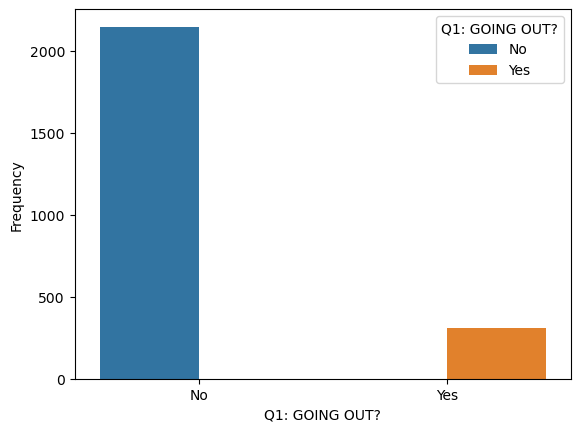

In [43]:
sns.countplot(data=df,x="Q1: GOING OUT?",hue="Q1: GOING OUT?")
plt.ylabel("Frequency")
plt.show()

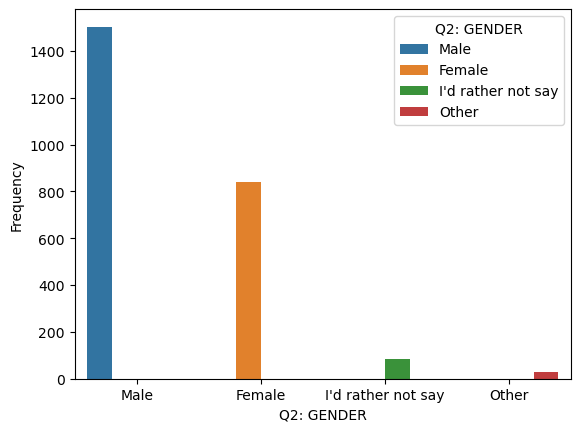

In [44]:
sns.countplot(data=df,x="Q2: GENDER",hue="Q2: GENDER")
plt.ylabel("Frequency")
plt.show()

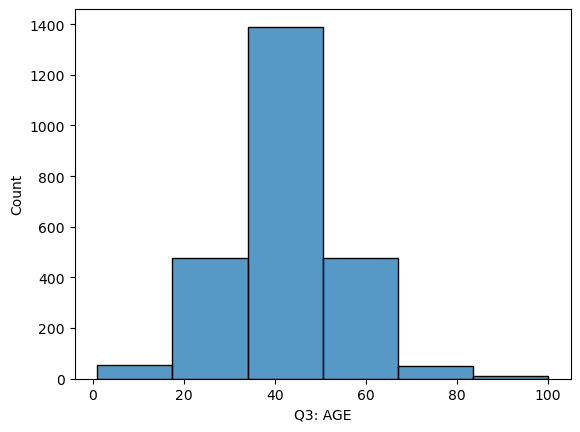

In [45]:
sns.histplot(data=df,x="Q3: AGE",bins=6)
plt.show()

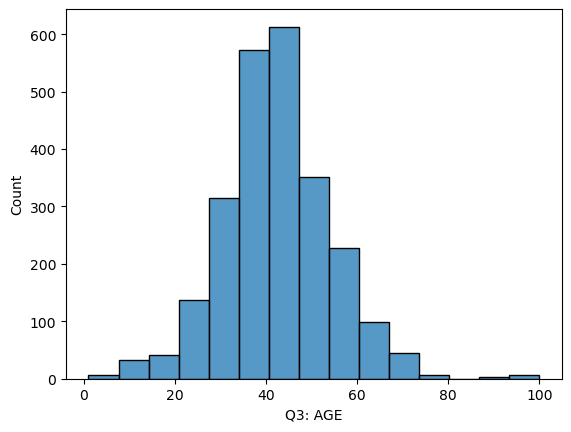

In [46]:
sns.histplot(data=df,x="Q3: AGE",bins=15)
plt.show()

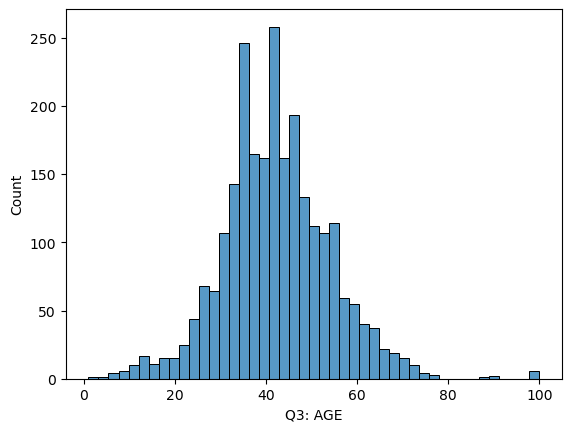

In [47]:
sns.histplot(data=df,x="Q3: AGE")
plt.show()

In [48]:
country_age=df.groupby("Q4: COUNTRY")["Q3: AGE"].mean().sort_values().reset_index()
country_age.head()

,Q4: COUNTRY,Q3: AGE
0,europe,10.0
1,northcarolina,11.0
2,newyork,12.0
3,cascadia,12.0
4,iceland,17.0


In [49]:
country_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Q4: COUNTRY  48 non-null     object 
 1   Q3: AGE      48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


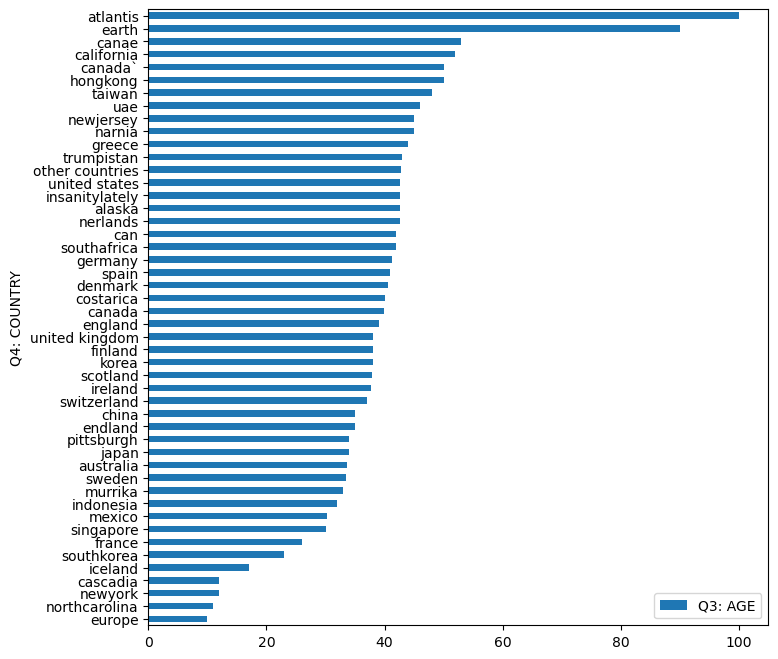

In [50]:
fig,ax=plt.subplots(figsize=(8,8))
country_age.plot(x="Q4: COUNTRY",y="Q3: AGE",kind="barh",ax=ax);

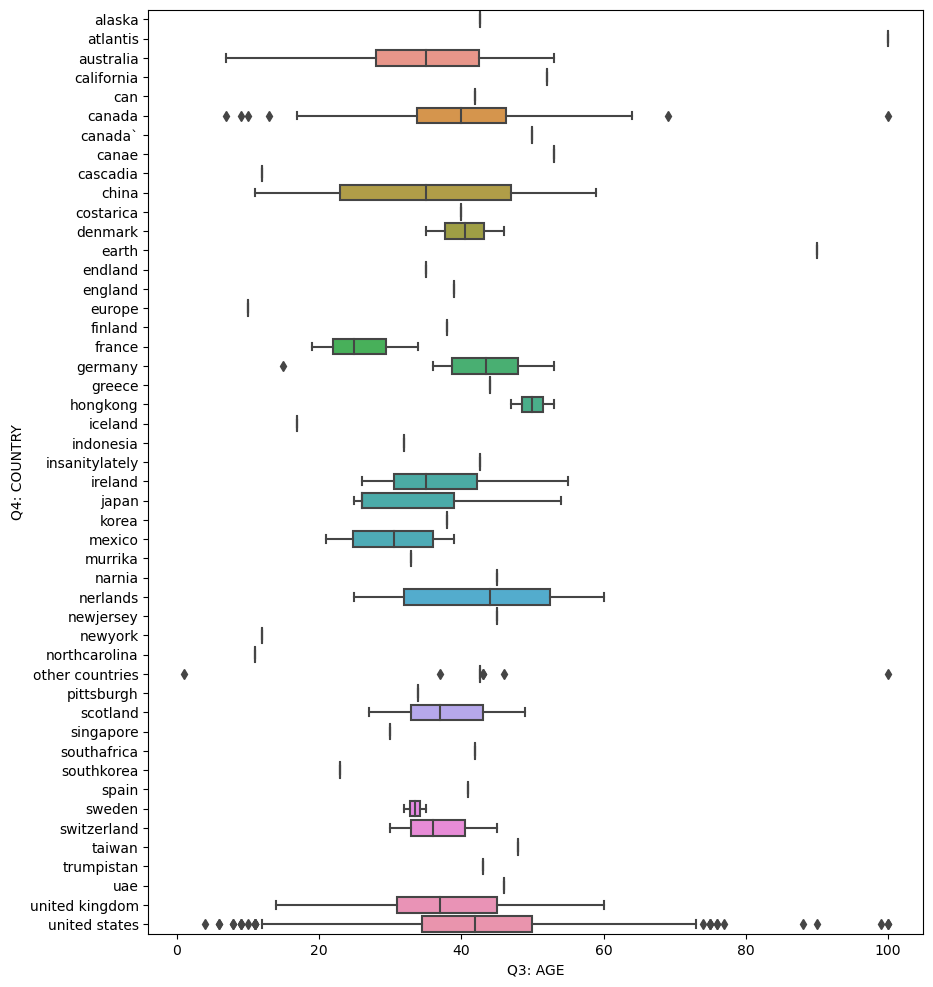

In [51]:
fig,ax=plt.subplots(figsize=(10,12))
sns.boxplot(data=df,y="Q4: COUNTRY",x="Q3: AGE",ax=ax,order=df["Q4: COUNTRY"].sort_values().unique())
plt.show()

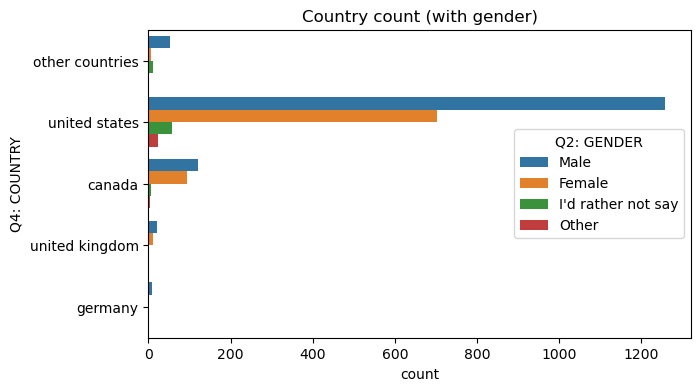

In [52]:
fig,ax=plt.subplots(figsize=(7,4))
sns.countplot(data=df[df["Q4: COUNTRY"].isin(df["Q4: COUNTRY"].value_counts()[:5].index)],y="Q4: COUNTRY",hue='Q2: GENDER',ax=ax,)
plt.title("Country count (with gender)")
plt.show()

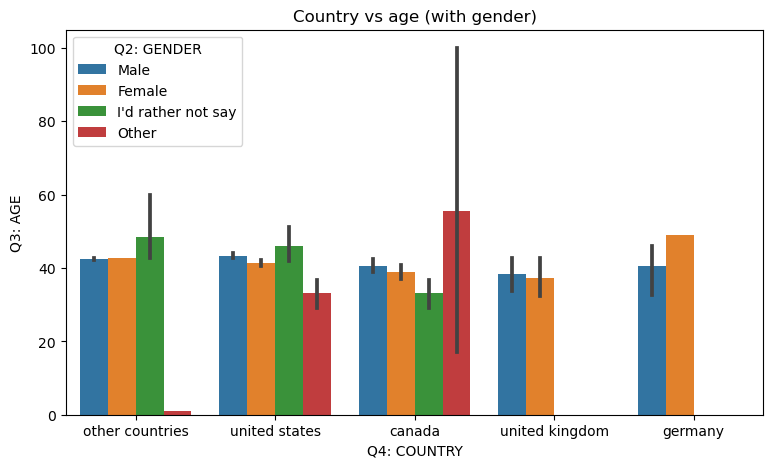

In [53]:
fig,ax=plt.subplots(figsize=(9,5))
sns.barplot(data=df[df["Q4: COUNTRY"].isin(df["Q4: COUNTRY"].value_counts()[:5].index)],y= 'Q3: AGE',x="Q4: COUNTRY",hue='Q2: GENDER',ax=ax,)
plt.title("Country vs age (with gender)")
plt.show()

In [54]:
choice={"JOY":0,"MEH":0,"DESPAIR":0}
columns=[]
for index, column in enumerate(df):
    if column.startswith("Q6 | "):
        columns.append(column)
        for i in choice:
            for j in dict(df[column].value_counts()):
                if i==j:
                    choice[i]+=dict(df[column].value_counts())[i]
plt.show()
choice

{'JOY': 89650, 'MEH': 51268, 'DESPAIR': 67842}

In [55]:
choices_df=pd.DataFrame(choice,index=["JOY","MEH","DESPAIR"])
for col in choices_df:
    for row in choices_df.index:
        if row!=col:
            choices_df.loc[row,col]=0

In [56]:
len(columns)

85

## The barplot  below 🔽 tells us that most of chocolates are good

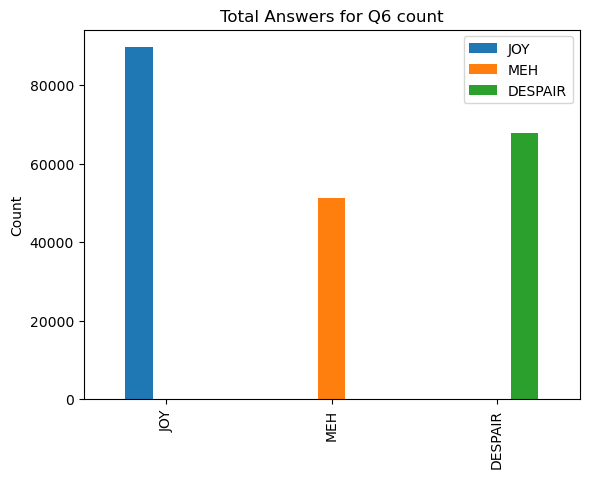

In [57]:
choices_df.plot(kind="bar")
plt.ylabel("Count")
plt.title("Total Answers for Q6 count")
plt.show()

# If you want to see all counts of Q6[chocolate type] .. uncomment the code below 🔽

In [58]:
# fig,ax=plt.subplots(42,2, figsize=(12,150))

# for index,a in enumerate(ax.flatten()):
#     sns.countplot(data=df,x=columns[index],ax=a)
# plt.show()   
# fig,ax=plt.subplots(figsize=(6,3))
# sns.countplot(data=df,x=columns[index],ax=ax)
# plt.show()

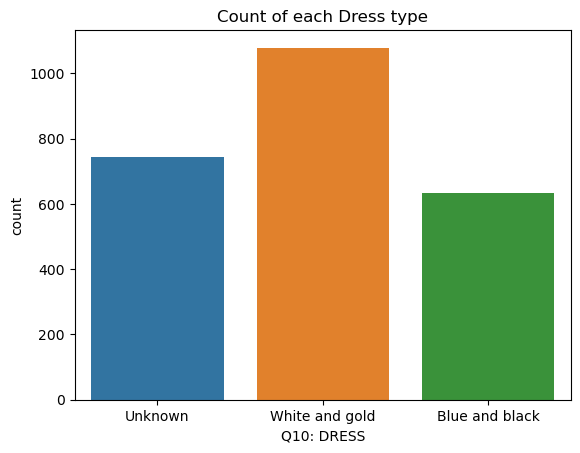

In [59]:
sns.countplot(data=df,x='Q10: DRESS')
plt.title("Count of each Dress type")
plt.show()

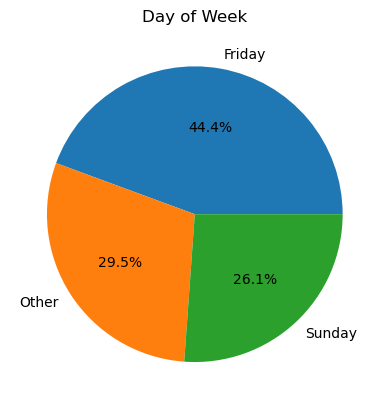

In [60]:

plt.pie(x=df['Q11: DAY'].value_counts(),labels=df['Q11: DAY'].value_counts().index,autopct="%0.1f%%")
plt.title("Day of Week")
plt.show()

# For Answering Question : 
## •10 most loved chocolates
## •10 most hated chocolates                                                                

In [61]:
types_count=dict()

for i in columns:
    joy=df[i].str.count("JOY").sum()
    dispair=df[i].str.count("DESPAIR").sum()
    meh=df[i].str.count("MEH").sum()
    types_count[i]=dict({"JOY":joy,"DESPAIR":dispair,"MEH":meh})

count_df=pd.DataFrame(data=types_count.values(),index=types_count.keys())
count_df.head()

,JOY,DESPAIR,MEH
Q6 | 100 Grand Bar,1617,85,754
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),175,1820,461
Q6 | Any full-sized candy bar,2227,17,212
Q6 | Bottle Caps,464,559,1433
Q6 | Box'o'Raisins,116,1864,476


In [62]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Q6 | 100 Grand Bar to Q6 | York Peppermint Patties
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   JOY      85 non-null     int64
 1   DESPAIR  85 non-null     int64
 2   MEH      85 non-null     int64
dtypes: int64(3)
memory usage: 2.7+ KB


In [63]:
joy=count_df["JOY"]
despair=count_df["DESPAIR"]
joy_dispair=joy-despair
joy_dispair

Q6 | 100 Grand Bar                                                                        1532
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)   -1645
Q6 | Any full-sized candy bar                                                             2210
Q6 | Bottle Caps                                                                           -95
Q6 | Box'o'Raisins                                                                       -1748
                                                                                          ... 
Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein              -1703
Q6 | Vicodin                                                                              -805
Q6 | White Bread                                                                         -2166
Q6 | Whole Wheat anything                                                                -1917
Q6 | York Peppermint Patties                      

In [64]:
most_loved=joy.sort_values(ascending=False).head(10)
most_hated=despair.sort_values(ascending=False).head(10)
most_loved_second_approach=joy_dispair.sort_values(ascending=False).head(10)
most_hated_second_approach=joy_dispair.sort_values(ascending=True).head(10)

# First Approach

### most loved

In [65]:
index_list_most_loved=list(most_loved.index.str.replace("|","").str.replace("Q6 ",""))
index_list_most_loved=[" ".join(i.split(" ")[:4]) for i in index_list_most_loved]

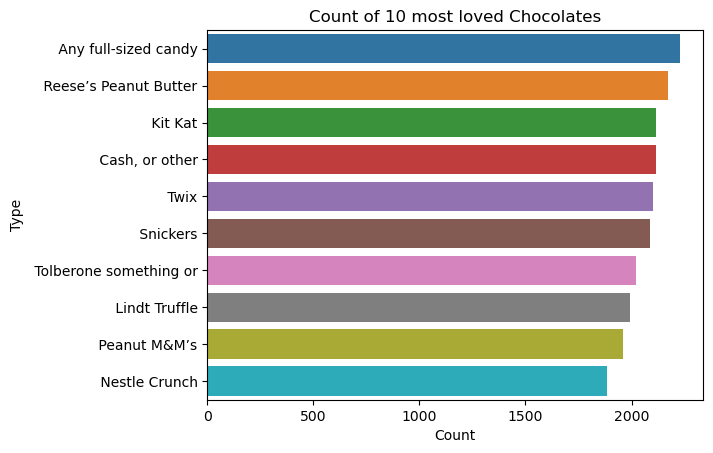

In [66]:
sns.barplot(data=most_loved.to_frame(),x=most_loved.values,y=index_list_most_loved)
plt.xlabel("Count")
plt.ylabel("Type")
plt.title("Count of 10 most loved Chocolates")
plt.show()

### most hated

In [67]:
index_list_most_hated=list(most_hated.index.str.replace("|","").str.replace("Q6 ",""))
index_list_most_hated=[" ".join(i.split(" ")[:4]) for i in index_list_most_hated]

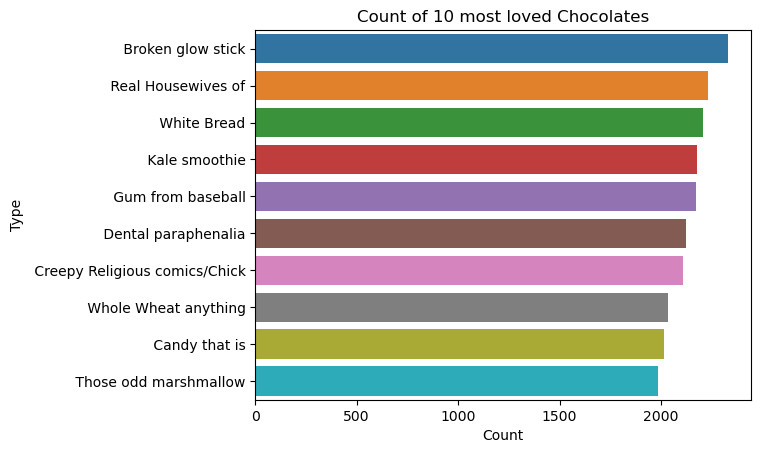

In [68]:
sns.barplot(data=most_hated.to_frame(),x=most_hated.values,y=index_list_most_hated)
plt.xlabel("Count")
plt.ylabel("Type")
plt.title("Count of 10 most loved Chocolates")
plt.show()

# Second Approach

### most loved

In [69]:
index_list_most_loved_2=list(most_loved_second_approach.index.str.replace("|","").str.replace("Q6 ",""))
index_list_most_loved_2=[" ".join(i.split(" ")[:4]) for i in index_list_most_loved_2]

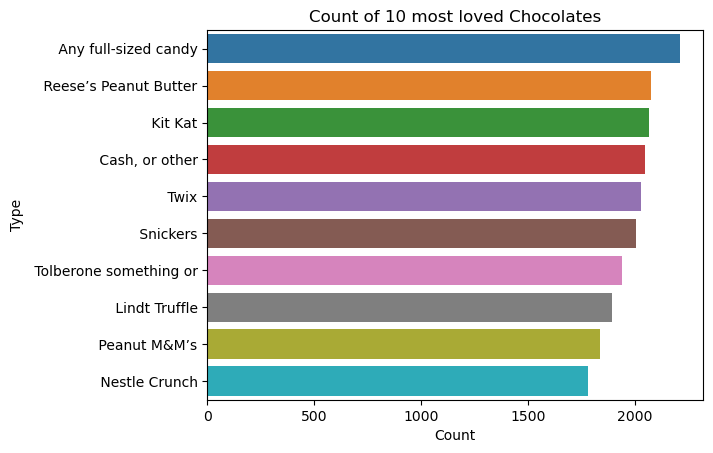

In [70]:
sns.barplot(data=most_loved_second_approach.to_frame(),x=most_loved_second_approach.values,y=index_list_most_loved_2)
plt.xlabel("Count")
plt.ylabel("Type")
plt.title("Count of 10 most loved Chocolates")
plt.show()

### most hated

In [71]:
index_list_most_hated_2=list(most_hated_second_approach.index.str.replace("|","").str.replace("Q6 ",""))
index_list_most_hated_2=[" ".join(i.split(" ")[:4]) for i in index_list_most_hated_2]

In [72]:
most_hated_abs_values=most_hated_second_approach.values
most_hated_abs_values=abs(most_hated_abs_values)
most_hated_abs_values

array([2307, 2166, 2142, 2132, 2069, 2032, 1975, 1917, 1864, 1798],
      dtype=int64)

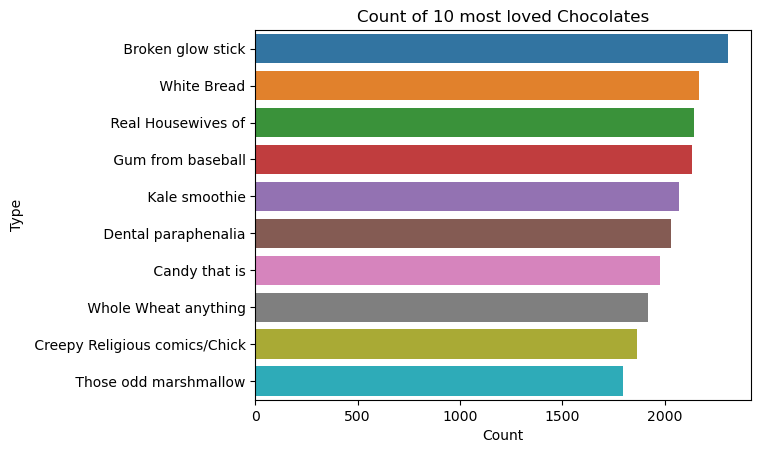

In [73]:
sns.barplot(data=most_hated_second_approach.to_frame(),x=most_hated_abs_values,y=index_list_most_hated_2)
plt.xlabel("Count")
plt.ylabel("Type")
plt.title("Count of 10 most loved Chocolates")
plt.show()